# Keras函数式API

**本代码来自弗朗索瓦·肖莱著《python深度学习》**

In [14]:
import tensorflow as tf

version = tf.__version__  #查看Tensorflow版本
print("tensorflow_gpu version:", version)

tensorflow_gpu version: 2.6.0


In [15]:
tf.config.list_physical_devices('GPU')#查看GPU是否可用

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [16]:
from tensorflow import keras
print("keras version:",keras.__version__)

keras version: 2.6.0


In [4]:
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Model

input_tensor = Input(shape=(64, ))
x = layers.Dense(32, activation = 'relu')(input_tensor)
x = layers.Dense(32, activation = 'relu')(x)
output_tensor = layers.Dense(10, activation = 'softmax')(x)

model = Model(input_tensor, output_tensor)#Model类将输入张量与输出张量转换为一个模型，实例化
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

import numpy as np
x_train = np.random.random((1000,64))
y_train = np.random.random((1000,10))

model.fit(x_train, y_train, epochs=10, batch_size=128)
score = model.evaluate(x_train, y_train)

Epoch 1/10
8/8 [==============================] - 2s 7ms/step - loss: 12.5215
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 13.9000
Epoch 3/10
8/8 [==============================] - 0s 6ms/step - loss: 15.8680
Epoch 4/10
8/8 [==============================] - 0s 5ms/step - loss: 18.4025
Epoch 5/10
8/8 [==============================] - 0s 5ms/step - loss: 21.3592
Epoch 6/10
8/8 [==============================] - 0s 6ms/step - loss: 24.8710
Epoch 7/10
8/8 [==============================] - 0s 5ms/step - loss: 28.9569
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 33.4155
Epoch 9/10
8/8 [==============================] - 0s 5ms/step - loss: 38.2374
Epoch 10/10
32/32 [==============================] - 0s 1ms/step - loss: 46.7947


## 问答模型(多输入)

In [5]:
#模型构建
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Model

text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype='int32', name='text')#可以选择对输入名称进行命名
embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input)
encoded_text = layers.LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype='int32', name='question')
embedded_question = layers.Embedding(question_vocabulary_size, 64)(question_input)
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis = -1)
answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)
model = Model([text_input, question_input], answer)
model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
             metrics=['acc'])

In [6]:
#数据输入
import numpy as np
from tensorflow.keras.utils import to_categorical

num_samples = 1000
max_length = 100

text = np.random.randint(1, text_vocabulary_size,size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size,size=(num_samples, max_length))
answers = np.random.randint(answer_vocabulary_size,size=(num_samples))
answers = to_categorical(answers, answer_vocabulary_size)

#model.fit([text, question], answers, epochs=10, batch_size=128)
model.fit({'text':text, 'question':question}, answers, epochs=10, batch_size=128)#这种写法与上述一致，当输出层具有名字时才采用这种写法

Epoch 1/10
8/8 [==============================] - 3s 40ms/step - loss: 6.2147 - acc: 0.0040
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 6.1923 - acc: 0.0310
Epoch 3/10
8/8 [==============================] - 0s 11ms/step - loss: 6.1286 - acc: 0.0020
Epoch 4/10
8/8 [==============================] - 0s 10ms/step - loss: 6.0448 - acc: 0.0060
Epoch 5/10
8/8 [==============================] - 0s 10ms/step - loss: 5.9376 - acc: 0.0090
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 5.8267 - acc: 0.0260
Epoch 7/10
8/8 [==============================] - 0s 10ms/step - loss: 5.7421 - acc: 0.0430
Epoch 8/10
8/8 [==============================] - 0s 10ms/step - loss: 5.6711 - acc: 0.0590
Epoch 9/10
8/8 [==============================] - 0s 10ms/step - loss: 5.6135 - acc: 0.0600
Epoch 10/10
8/8 [==============================] - 0s 10ms/step - loss: 5.5416 - acc: 0.0620


## 社交媒体发帖预测(多输出)

In [8]:
#模型构建
from tensorflow.keras import Input, layers
from tensorflow.keras.models import Model

vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(vocabulary_size, 256)(posts_input)
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Dense(128,activation='relu')(x)

age_prediction = layers.Dense(1, name='age')(x)#年龄预测，回归
income_prection = layers.Dense(num_income_groups,#收入水平预测，多分类
                              activation='softmax',
                              name='income')(x)
gender_prediction = layers.Dense(1,activation='sigmoid', name='gender')(x)#性别预测，二分类

model = Model(posts_input, [age_prediction, income_prection, gender_prediction])
model.summary()

model.compile(optimizer='rmsprop',
             loss={'age':'mse',
                  'income':'categorical_crossentropy',
                  'gender':'binary_crossentropy'},
             loss_weights={'age':0.25,
                  'income':1.,
                  'gender':10.})
# model.fit(posts, {'age':age_targets,
#                   'income':income_targets,
#                   'gender':gender_targets},
#          epochs=10,batch_size=64)#posts为社交媒体发帖文，其后为标签

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
posts (InputLayer)              [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 256)    12800000    posts[0][0]                      
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 128)    163968      embedding_2[0][0]                
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, None, 128)    0           conv1d[0][0]                     
____________________________________________________________________________________________

## 层组成的有向无环图

### Inception模块

Inception是一种流行的卷积神经网络的架构类型,由Google开发,完整的Inception v3架构内置于Keras中,位置在keras.applications.inception_v3.InceptionV3中,其中包括在ImageNet数据集上训练得到的权重.

### 残差连接

残差连接是让前面某层的输出作为后面某层的输入，从而在序列网络中有效的创造了一条捷径，前面层的输出没有与后面层的激活连接在一起，而是与后面层的激活相加。layers.add([x,y])

## Keras回调函数

In [9]:
import tensorflow.keras 

callbacks_list = [tensorflow.keras.callbacks.EarlyStopping(monitor='acc', #监控模型的验证精度
                                                                     patience=1,),#如果精度在多于一轮的时间内不再改善，中断训练
                 tensorflow.keras.callbacks.ModelCheckpoint(filepath='my_model.h5',
                                                                     monitor='val_loss',
                                                                     save_best_only=True,),
                 tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',#监控模型的验证损失
                                                                       factor=0.1,#触发时将学习率除以10
                                                                       patience=10,)]#如果验证损失在10轮内没有改善，触发回调函数
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

# model.fit(x,y,
#          epochs=10,
#          batch_size=32,
#          callbacks=callbacks_list,
#          validation_data=(x_val, y_val))

## TensorBoard可视化

In [7]:
#准备IMDB数据
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

max_features = 2000#作为特征的单词数
maxlen = 500

(input_train,y_train),(input_test,y_test) = imdb.load_data(num_words = max_features)
#imdb为已经分好词的序列，直接将其转成张量
input_train = sequence.pad_sequences(input_train, maxlen = maxlen)
input_test = sequence.pad_sequences(input_test, maxlen = maxlen)

In [8]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen, name='embed'))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation = 'relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

model.compile(optimizer = RMSprop(learning_rate=1e-4), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
__________________________________________________

In [9]:
import tensorflow.keras 
callbacks = [tensorflow.keras.callbacks.TensorBoard(log_dir='D:\\Jupyter notebook\\Dataset\\python\\aclImdb\\my_log_dir',
                                                             histogram_freq=1,
                                                             embeddings_freq=1,)]
history = model.fit(input_train,y_train,
                    epochs=20,
                    batch_size=128,
                    callbacks=callbacks,
                    validation_split=0.2)

Epoch 1/20
157/157 [==============================] - 3s 9ms/step - loss: 0.6974 - acc: 0.5386 - val_loss: 0.6810 - val_acc: 0.5816
Epoch 2/20
157/157 [==============================] - 1s 6ms/step - loss: 0.6664 - acc: 0.6303 - val_loss: 0.6632 - val_acc: 0.6396
Epoch 3/20
157/157 [==============================] - 1s 6ms/step - loss: 0.6328 - acc: 0.7049 - val_loss: 0.6242 - val_acc: 0.6598
Epoch 4/20
157/157 [==============================] - 1s 6ms/step - loss: 0.5591 - acc: 0.7687 - val_loss: 0.5162 - val_acc: 0.7832
Epoch 5/20
157/157 [==============================] - 1s 6ms/step - loss: 0.4574 - acc: 0.8158 - val_loss: 0.4439 - val_acc: 0.8178
Epoch 6/20
157/157 [==============================] - 1s 6ms/step - loss: 0.3953 - acc: 0.8458 - val_loss: 0.4212 - val_acc: 0.8420
Epoch 7/20
157/157 [==============================] - 1s 6ms/step - loss: 0.3613 - acc: 0.8631 - val_loss: 0.4163 - val_acc: 0.8472
Epoch 8/20
157/157 [==============================] - 1s 6ms/step - loss: 0.

In [30]:
#tensorboard --logdir='D:\\Jupyter notebook\\Dataset\\python\\aclImdb\\my_log_dir'#命令行运行，首先要切换到对应环境 conda activate tensorflow_gpu,logdir后面的定位到目录即可,目录里面为.v2文件,不必找到对应文件

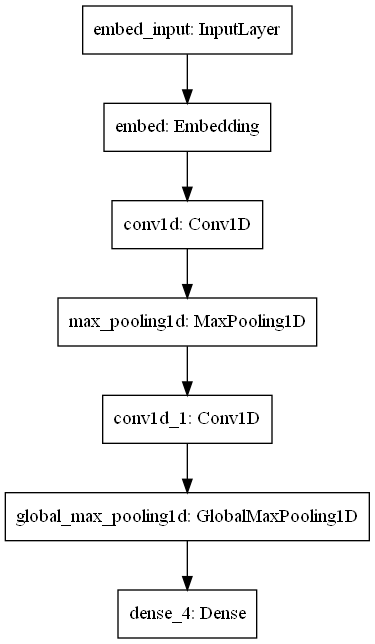

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='D:\\Jupyter notebook\\Dataset\\python\\aclImdb\\model1.png')

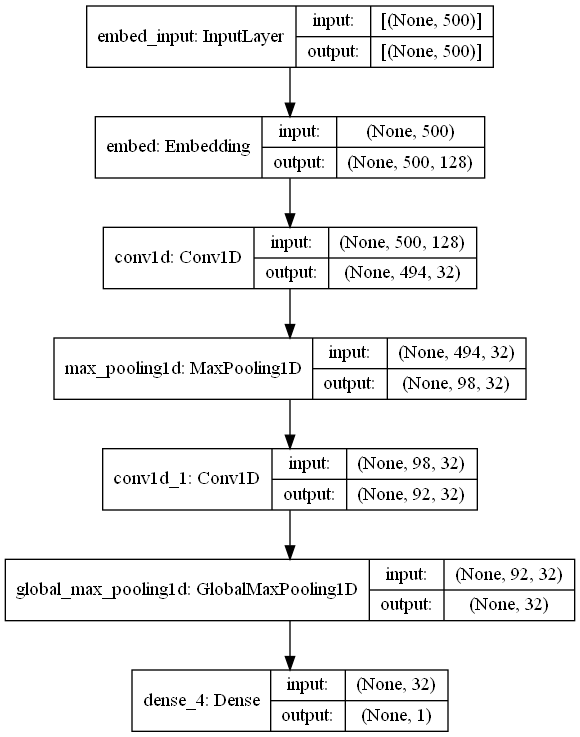

In [12]:
plot_model(model, show_shapes=True, to_file='D:\\Jupyter notebook\\Dataset\\python\\aclImdb\\model2.png')

## 高级架构模式

### 批标准化

BatchNormalization层通常在卷积层或密集连接层之后，layers.BatchNormalization()

### 深度可分离卷积

SeparableConv2D可以替代Conv2D,模型更加轻量。layers.SeparableConv2D()

## 超参数优化

模型参数之外的参数叫超参数，比如堆叠多少层？每层包含多少个单元或过滤器？Hyperopt库用于超参数优化，另一个是Hyperas库。

# 生成式深度学习

## 使用LSTM生成文本

## DeepDream

## 神经风格迁移

## 变分自编码器(VAE)

## 生成式对抗网络(GAN)

生成式对抗网络迫使生成图像与真实图像在统计上几乎无法区别，从而生成相当逼真的合成图像。GAN由一个生成器网络(generator)和一个判别式网络(discriminator)组成。判别器的训练目的是能够区分生成器的输出与来自训练集的真实图像，生成器的训练目的是欺骗判别器。生成器从未直接见过训练集中的图像，它所知道的关于数据的信息都来自于判别器。

In [13]:
#GAN生成器网络
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

latent_dim = 32
height = 32
width = 32
channels = 3#通道数

generator_input = tensorflow.keras.Input(shape=(latent_dim,))

x = layers.Dense(128 * 16 * 16)(generator_input)#将输入转换为大小16*16的128个通道的特征图
x = layers.LeakyReLU()(x)
x = layers.Reshape((16, 16, 128))(x)

x = layers.Conv2D(256, 5, padding='same')(x)#如果padding设置为same,则说明输入图片大小和输出图片大小是一致的
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)#步进为2，上采样为32*32
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(256, 5, padding='same')(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(channels, 7, activation='tanh', padding='same')(x)
generator = tensorflow.keras.models.Model(generator_input, x)
generator.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 32768)             1081344   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32768)             0         
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 256)       1048

In [15]:
#GAN判别器网络
discriminator_input = layers.Input(shape=(height, width, channels))
x = layers.Conv2D(128,3)(discriminator_input)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Conv2D(128,4, strides=2)(x)
x = layers.LeakyReLU()(x)
x = layers.Flatten()(x)

x = layers.Dropout(0.4)(x)

x = layers.Dense(1, activation='sigmoid')(x)

discriminator = tensorflow.keras.models.Model(discriminator_input, x)
discriminator.summary()

discriminator_optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0008,
                                                                       clipvalue=1.0,
                                                                       decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer,
                     loss='binary_crossentropy')

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 6, 6, 128)         262272    
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 6, 6, 128)         0   

In [16]:
#生成对抗网络
discriminator.trainable = False#将判别器的权重设置为不可训练

gan_input = tensorflow.keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = tensorflow.keras.models.Model(gan_input, gan_output)
gan_optimizer = tensorflow.keras.optimizers.RMSprop(lr=0.0004,
                                                              clipvalue=1.0,
                                                              decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='binary_crossentropy')

In [17]:
#实现DCGAN(深度卷积生成式对抗网络)的训练
import os
import numpy as np
from tensorflow.keras.preprocessing import image

(x_train, y_train), (_, _) = tensorflow.keras.datasets.cifar10.load_data()#选择CIFAR10数据

x_train = x_train[y_train.flatten() == 6]#选择青蛙图像

x_train = x_train.reshape((x_train.shape[0],)+(height, width, channels)).astype('float32') / 255. #数据标准化

iterations = 10000
batch_size = 20
save_dir = "D:\\Jupyter notebook\\Dataset\\python\\CIFAR10"

start = 0
for step in range(iterations):
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))#在潜在空间采样随机点
    
    generated_images = generator.predict(random_latent_vectors)#将这些点解码为虚假图像
    
    stop = start + batch_size
    real_images = x_train[start: stop]
    combined_images = np.concatenate([generated_images, real_images])#将虚假图像与真实图像混在一起
    
    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])#合并标签
    
    labels += 0.05 *np.random.random(labels.shape)#添加随机噪声
    
    d_loss = discriminator.train_on_batch(combined_images, labels)#训练判别器
    
    random_latent_vectors = np.random.normal(size=(batch_size, latent_dim))#在潜在空间采样随机点
    
    misleading_targets = np.zeros((batch_size, 1))#合并标签
    
    a_loss = gan.train_on_batch(random_latent_vectors, misleading_targets)#训练生成器
    
    start += batch_size
    if start > len(x_train) - batch_size:
        start = 0
        
    if step % 100 == 0:#每100步保存并绘图
        gan.save_weights('D:\\Jupyter notebook\\Dataset\\python\\CIFAR10\\gan.h5')
        
        print('discriminator loss:', d_loss)
        print('adversarial loss:', a_loss)
        
        img = image.array_to_img(generated_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'generated_frog' + str(step) + '.png'))#保存生成图像
        
        img = image.array_to_img(real_images[0] * 255., scale=False)
        img.save(os.path.join(save_dir, 'real_frog' + str(step) + '.png'))#保存真实图像，用于对比

170508288/170498071 [==============================] - 875s 5us/step
discriminator loss: 0.6920443773269653
adversarial loss: 0.6682441234588623
discriminator loss: 0.7091978192329407
adversarial loss: 0.7895384430885315
discriminator loss: 0.7099349498748779
adversarial loss: 0.8158376812934875
discriminator loss: 0.6931217312812805
adversarial loss: 0.789495587348938
discriminator loss: 0.6931848526000977
adversarial loss: 0.748886227607727
discriminator loss: 0.6915447115898132
adversarial loss: 0.7594186663627625
discriminator loss: 0.6992426514625549
adversarial loss: 0.7394684553146362
discriminator loss: 0.6934609413146973
adversarial loss: 0.7732705473899841
discriminator loss: 0.6911784410476685
adversarial loss: 0.7508165240287781
discriminator loss: 0.7042888402938843
adversarial loss: 0.7373267412185669
discriminator loss: 0.6934107542037964
adversarial loss: 0.746667206287384
discriminator loss: 0.6877438426017761
adversarial loss: 0.7890115976333618
discriminator loss: 0.

**本代码来自保罗·加莱奥内著《Tensorflow2.0神经网络实践》**

# Tensorflow Hub进行图像分类

## 获取数据

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", with_info=True)#花卉分类问题，有5个类别，雏菊、蒲公英、玫瑰、向日葵、郁金香
print(info)

tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='C:\\Users\\Administrator\\tensorflow_datasets\\tf_flowers\\3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)


In [18]:
dataset = dataset["train"]
tot = 3670

train_set_size = tot // 2
validation_set_size = tot - train_set_size - train_set_size // 2
test_set_size = tot - train_set_size -validation_set_size

train, test ,validation = (dataset.take(train_set_size),#取前train_set_size个元素构建dataset
                          dataset.skip(train_set_size).take(validation_set_size),
                           #dataset.skip(train_set_size)跳过前train_set_size个元素后构建的dataset
                          dataset.skip(train_set_size + validation_set_size).take(test_set_size),)

In [19]:
#将数据转换成符合Inception网络的格式
import tensorflow as tf
def to_float_image(example):#Inception v3类型是tf.float32，而原始数据是tf.uint8
    example["image"] = tf.image.convert_image_dtype(example["image"], tf.float32)
    return example

def resize(example):#Inception v3架构需要299×299×3的固定输入形状，所以进行转换
    example["image"] = tf.image.resize(example["image"], (299, 299))
    return example

train = train.map(to_float_image).map(resize)
validation = validation.map(to_float_image).map(resize)
test = test.map(to_float_image).map(resize)

## 迁移学习

所有用于图像分类的卷积架构都具有固定的结构：  
输入层：该结构旨在接受具有精确分辨率的图像。   
特征提取器：这是卷积、池化、归一化以及在输入层和第一个密集层之间的每一层的集合。   
分类层：全连接层的堆叠-分类器。

迁移学习是指依靠先前学习过的任务来学习新任务的过程：学习过程可以更快，更准确，并且需要的训练数据更少。将一个训练好的模型的知识迁移到一个新模型中，需要移除网络中特定的任务部分（分类层），并将CNN固定为特征提取器。tensorflow团队创建了预训练模型Tensorflow Hub。Tensorflow Hub是一个用于发布、发现和使用机器学习模型的可重用部分的库。迁移学习可以用较小的数据集训练模型、泛化训练、加速训练。

使用Inception v3作为特征提取器，网络期望输入图像的分辨率为299×299×3，并生成8×8×2048的特征图。

In [20]:
import os
os.environ["TFHUB_CACHE_DIR"] = 'D:\\Jupyter notebook\\Dataset\\python\\tfhub'#在加载tfhub模型前，设置一下tfhub的下载路径

In [21]:
import hashlib#调用代码计算出模型文件的hash值
handle = "https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2"
hashlib.sha1(handle.encode("utf8")).hexdigest()
#在设置的tfhub缓存目录中建立一个文件夹，文件夹名称就是刚刚计算出来的hash值，然后将下载的1.tar.gz解压出来，放到刚刚新建的目录中即可

'5cf1e8f944ef572fbd27c62e35e433f53159c260'

In [22]:
import tensorflow_hub as hub

num_classes = 5#分类数量

model = tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2", 
                     output_shape=[2048], 
                     trainable=False,), 
                            tf.keras.layers.Dense(512),
                            tf.keras.layers.ReLU(),
                            tf.keras.layers.Dense(num_classes),])

AlreadyExistsError: Another metric with the same name already exists.

## 训练与评估

In [11]:
import tensorflow as tf
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
step = tf.Variable(1, name="global_step", trainable=False)
optimizer = tf.optimizers.Adam(1e-3)

train_summary_writer = tf.summary.create_file_writer("D:\\Jupyter notebook\\Dataset\\python\\tensorflow_datasets\\tf_flowers\\train")
validation_summary_writer = tf.summary.create_file_writer("D:\\Jupyter notebook\\Dataset\\python\\tensorflow_datasets\\tf_flowers\\validation")

accuracy = tf.metrics.Accuracy()
mean_loss = tf.metrics.Mean(name="loss")
@tf.function#将python代码自动转化为图表示,AutoGraph
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        logtis = model(inputs)
        loss_value = loss(labels, logtis)
        
    gradients = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    step.assign_add(1)
    
    accuracy.update_state(labels, tf.argmax(logtis, -1))
    return loss_value

train = train.batch(32).prefetch(1)
validation = validation.batch(32).prefetch(1)
test = test.batch(32).prefetch(1)

num_epochs = 10
for epoch in range(num_epochs):

    for example in train:
        image, label  = example["image"], example["label"]
        loss_value = train_step(image, label)
        mean_loss.update_state(loss_value)
        
        if tf.equal(tf.math.mod(step, 10), 0):
            tf.print(step, "loss:", mean_loss.result(), "accuracy:", accuracy.result())
            mean_loss.reset_states()
            accuracy.reset_states()
            
    tf.print("## VALIDATION - ", epoch)
    accuracy.reset_states()
    for example in validation:
        image, label  = example["image"], example["label"]
        logits = model(image)
        accuracy.update_state(label, tf.argmax(logits, -1))
    tf.print("accuracy:", accuracy.result())
    accuracy.reset_states()

10 loss: 1.60935259 accuracy: 0.461805552
20 loss: 0.679760337 accuracy: 0.7875
30 loss: 0.575210214 accuracy: 0.790625
40 loss: 0.475069225 accuracy: 0.828125
50 loss: 0.388537556 accuracy: 0.85
## VALIDATION -  0
accuracy: 0.858233392
60 loss: 0.308593184 accuracy: 0.90625
70 loss: 0.291253716 accuracy: 0.9
80 loss: 0.25739342 accuracy: 0.925
90 loss: 0.358302265 accuracy: 0.88125
100 loss: 0.299443126 accuracy: 0.890625
110 loss: 0.233322829 accuracy: 0.909375
## VALIDATION -  1
accuracy: 0.864776433
120 loss: 0.199323624 accuracy: 0.927083313
130 loss: 0.16885756 accuracy: 0.96875
140 loss: 0.199135989 accuracy: 0.94375
150 loss: 0.204808757 accuracy: 0.928125
160 loss: 0.193095922 accuracy: 0.91875
170 loss: 0.159385726 accuracy: 0.946875
## VALIDATION -  2
accuracy: 0.886586666
180 loss: 0.160045251 accuracy: 0.94375
190 loss: 0.105245627 accuracy: 0.978125
200 loss: 0.170233414 accuracy: 0.94375
210 loss: 0.147633448 accuracy: 0.946875
220 loss: 0.138940498 accuracy: 0.95625
230

# 目标检测

目标检测的目的是检测矩形区域中的目标。本章介绍的是单目标检测。处理目标检测问题最先进的方法是采用卷积神经网络，卷积神经网络不仅可以用来提取有意义的分类特征，还可以用于回归边界框的坐标，回归单个目标的边界框坐标并对其内容进行分类的任务，称为定位与分类。

In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds#tensorflow自带数据集

In [24]:
print(tfds.list_builders())#返回可用的数据集

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_ad

In [25]:
builder = tfds.builder('voc')#数据集具体信息
print(builder.info)

tfds.core.DatasetInfo(
    name='voc',
    full_name='voc/2007/4.0.0',
    description="""
    This dataset contains the data from the PASCAL Visual Object Classes Challenge,
    corresponding to the Classification and Detection competitions.
    
    In the Classification competition, the goal is to predict the set of labels
    contained in the image, while in the Detection competition the goal is to
    predict the bounding box and label of each individual object.
    annotations.
    """,
    config_description="""
    This dataset contains the data from the PASCAL Visual Object Classes Challenge
    2007, a.k.a. VOC2007.
    
    A total of 9963 images are included in this dataset, where each image
    contains a set of objects, out of 20 different classes, making a total of
    24640 annotated objects.
    
    """,
    homepage='http://host.robots.ox.ac.uk/pascal/VOC/voc2007/',
    data_path='~\\tensorflow_datasets\\voc\\2007\\4.0.0',
    file_format=tfrecord,
    download_size=

## 获取数据

In [ ]:
(train, test, validation), info = tfds.load("voc", split=["train", "test", "validation"], with_info=True)#voc2007数据集

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                                                         | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                                                            | 0/430 [00:01<?, ? MiB/s]

Dl Size...:   0%|                                                                            | 0/868 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|                                                                  | 1/868 [00:08<1:55:38,  8.00s/ MiB]

Extraction completed...: 0 file [00:08, ? file/s]
Dl Size...:   0%|▏                                                                 | 2/868 [00:20<2:37:33, 10.92s/ MiB]

Extraction completed...: 0 f

label: horse


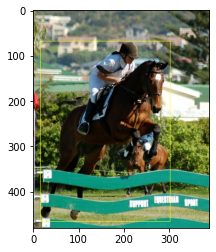

label: person


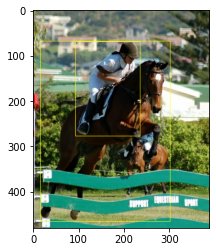

label: horse


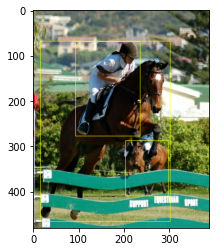

label: person


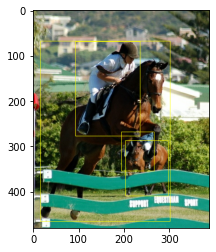

label: car


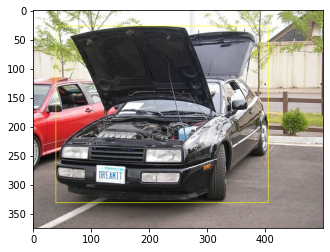

label: car


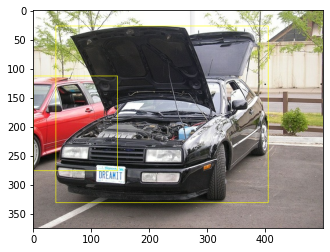

label: bird


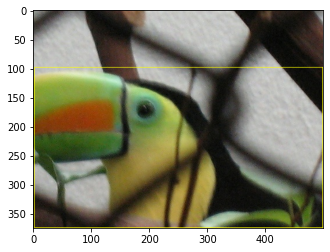

label: sheep


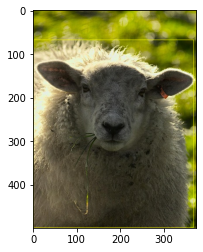

label: train


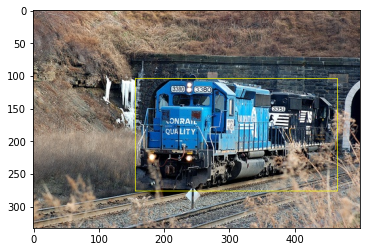

In [5]:
import matplotlib.pyplot as plt

with tf.device("/CPU:0"):
    for row in train.take(5):
        obj = row["objects"]
        image = tf.image.convert_image_dtype(row["image"], tf.float32)
        
        for idx in tf.range(tf.shape(obj["label"])[0]):
            image = tf.squeeze(tf.image.draw_bounding_boxes(images=tf.expand_dims(image, axis=[0]),
                                                            boxes=tf.reshape(obj["bbox"][idx], (1,1,4)),
                                                            colors=tf.reshape(tf.constant((1.0, 1.0, 0, 0)), (1, 4)),
                                                            ),
                               axis=[0],
                               )#tf.squeeze该函数返回一个张量，这个张量是将原始input中所有维度为1的那些维都删掉的结果
            print("label:", info.features["objects"]["label"].int2str(obj["label"][idx]))
            plt.imshow(image)
            plt.show()

In [6]:
def filter(dataset):#返回一个仅包含单个边界框的元素
    return dataset.filter(lambda row: tf.equal(tf.shape(row["objects"]["label"])[0], 1))
train, test, validation = filter(train), filter(test), filter(validation)

label: bird


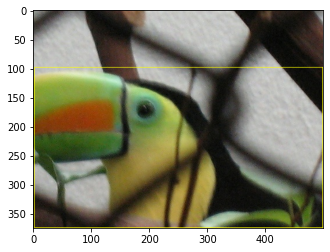

label: sheep


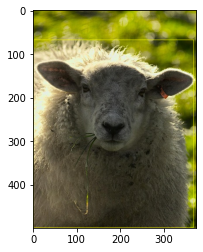

label: train


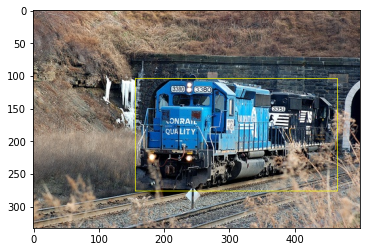

label: sheep


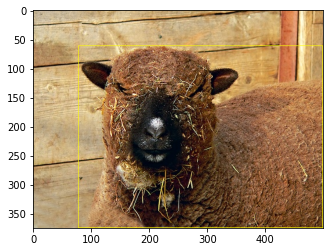

label: aeroplane


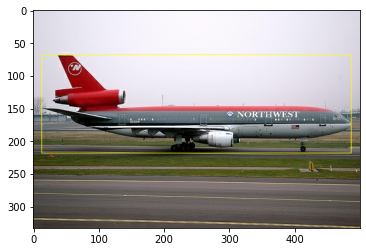

In [7]:
with tf.device("/CPU:0"):
    for row in train.take(5):
        obj = row["objects"]
        image = tf.image.convert_image_dtype(row["image"], tf.float32)
        
        for idx in tf.range(tf.shape(obj["label"])[0]):
            image = tf.squeeze(tf.image.draw_bounding_boxes(images=tf.expand_dims(image, axis=[0]),
                                                            boxes=tf.reshape(obj["bbox"][idx], (1,1,4)),
                                                            colors=tf.reshape(tf.constant((1.0, 1.0, 0, 0)), (1, 4)),
                                                            ),
                               axis=[0],
                               )
            print("label:", info.features["objects"]["label"].int2str(obj["label"][idx]))
            plt.imshow(image)
            plt.show()

## 目标定位

将定位问题视为包含输入图像目标的边界框的四个坐标的回归问题。目标是正确回归所有四个坐标，从而最小化预测值和实际值之间的距离。

In [8]:
import tensorflow_hub as hub
import os
os.environ["TFHUB_CACHE_DIR"] = 'D:\\Jupyter notebook\\Dataset\\tfhub'#在加载tfhub模型前，设置一下tfhub的下载路径

inputs = tf.keras.layers.Input(shape=(299, 299, 3))
net = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2", #tensorflow_hub下载一个预训练好的特征提取器并嵌入模型中
                     output_shape=[2048], 
                     trainable=False,)(inputs)
net = tf.keras.layers.Dense(512)(net)
net = tf.keras.layers.ReLU()(net)
coordinates = tf.keras.layers.Dense(4, use_bias=False)(net)#输出4个值

regressor = tf.keras.Model(inputs=inputs, outputs=coordinates)#定义模型

In [9]:
#将数据转换成符合Inception网络的格式
import tensorflow as tf
def to_float_image(example):#Inception v3类型是tf.float32，而原始数据是tf.uint8
    example["image"] = tf.image.convert_image_dtype(example["image"], tf.float32)
    return example

def resize(example):#Inception v3架构需要299×299×3的固定输入形状，所以进行转换
    example["image"] = tf.image.resize(example["image"], (299, 299))
    return example

train = train.map(to_float_image).map(resize)
validation = validation.map(to_float_image).map(resize)
test = test.map(to_float_image).map(resize)

In [10]:
#自定义l2损失函数
def l2(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_pred - tf.squeeze(y_true, axis=[1])))

In [11]:
#定义函数,并使用它们绘制真实边框和预测边框
def draw(dataset, regressor, step):
    with tf.device("/GPU:0"):
        row = next(iter(dataset.take(3).batch(3)))
        images = row["image"]
        obj = row["objects"]
        boxes = regressor(images)
        tf.print(boxes)
        
        images = tf.compat.v1.image.draw_bounding_boxes(images=images, boxes=tf.reshape(boxes, (-1, 1, 4)))
        images = tf.compat.v1.image.draw_bounding_boxes(images=images, boxes=tf.reshape(obj["bbox"], (-1, 1, 4)))
        tf.summary.image("images", images, step=step)
#该循环会在TensorBoard上记录训练损失值,以及对训练集和验证集中采样的三幅图像的预测(使用draw函数)

In [12]:
#定义用于跟踪训练迭代的global_step变量
optimizer = tf.optimizers.Adam()
epochs = 100
batch_size = 32

global_step = tf.Variable(0,trainable=False, dtype=tf.int64)

train_writer, validation_writer = (tf.summary.create_file_writer("D:\\Jupyter notebook\\Dataset\\tfhub\\train"),#摘要编写器,指定一个文件用来保存图。
                                  tf.summary.create_file_writer("D:\\Jupyter notebook\\Dataset\\tfhub\\validation"),)
#with validation_writer.as_default():
    #draw(validation, regressor, global_step)

In [13]:
#将训练步骤定义为一个函数,并使用tf.function将其转换为图形表示
@tf.function
def train_step(image, coordinates):
    with tf.GradientTape() as tape:
        loss = l2(coordinates, regressor(image))
    gradients = tape.gradient(loss, regressor.trainable_variables)
    optimizer.apply_gradients(zip(gradients, regressor.trainable_variables))
    return loss

In [ ]:
#在batches上定义训练循环,并在每次迭代时调用train_step函数
train_batches = train.cache().batch(batch_size).prefetch(1)
with train_writer.as_default():
    for _ in range(epochs):
        for batch in train_batches:
            obj = batch["objects"]
            coordinates = obj["bbox"]
            loss = train_step(batch["image"], coordinates)
            tf.summary.scalar("loss", loss, step=global_step)
            global_step.assign_add(1)
            if tf.equal(tf.math.mod(global_step, 10), 0):
                tf.print("step:", global_step,"loss:", loss)
                with validation_writer.as_default():#返回一个上下文管理器，这个上下管理器使用这个图作为默认的图
                    draw(validation, regressor, global_step)
                with train_writer.as_default():
                    draw(train, regressor, global_step)

step: 10 loss: 0.366461575
[[0.0904783309 -0.755345047 0.570486426 0.322499901]
 [0.0598993 -0.323867649 0.404481202 0.220302701]
 [0.12206459 -0.312993228 0.105162069 0.163753182]]
[[0.0875663832 -0.452280819 0.28646487 0.181550428]
 [0.0644405 -0.434540689 0.411556691 0.171609864]
 [0.0418922231 -0.380898535 0.360937953 0.269411147]]
step: 20 loss: 0.0908078924
[[0.0577223897 0.292132854 1.06840944 0.964613914]
 [0.00771203637 0.422595799 0.86816597 0.6409868]
 [0.152534142 0.44058156 0.81781745 0.604076]]
[[-0.00520172715 0.109494656 0.708577812 0.518031657]
 [-0.0339888185 0.0635926425 0.717834771 0.499288142]
 [0.0880430639 0.247998953 0.870795548 0.687834144]]
step: 30 loss: 0.0618019886
[[0.202282488 0.218634516 0.780499101 0.89136672]
 [0.206488416 0.30307138 0.672302723 0.628567636]
 [0.243237525 0.322645783 0.603953183 0.541324794]]
[[0.0554052144 -0.000426381826 0.544173777 0.489603698]
 [0.100316897 0.0657165349 0.621578455 0.459471464]
 [0.255964458 0.231739104 0.75892055 

[[0.125795677 -0.0514276177 0.859416842 0.756781399]
 [0.183257729 -0.0633532852 0.935834408 0.768218279]
 [0.341972828 0.286627054 0.925257623 0.88872683]]
step: 260 loss: 0.0188257061
[[0.0527363718 0.0397261381 0.755149126 0.701852202]
 [0.121041209 0.143652901 0.877838135 0.7521559]
 [0.0215502083 0.109358549 0.918728888 0.754432857]]
[[0.0856030285 -0.024765 0.854159832 0.695756316]
 [0.094322294 -0.0383132398 0.907522 0.70366168]
 [0.241492778 0.256127983 0.968539238 0.89206624]]


## IoU交互比

要达到完美匹配需要一个函数以数字分数来度量检测到的边界框质量,使用最广泛的度量定位质量的函数是交互比(Intersection over Union),IoU定义为两个区域的重叠区域(交)与合并区域(并)之比.IoU度量预测边界框与真实边界框的重叠程度,IoU值在[0,1]之间,0表示不匹配,1表示完美匹配,大于0.5被认为是匹配.

In [38]:
def iou(pred_box, gt_box, h, w):
    def _swap(box):#将坐标从绝对坐标转换为像素坐标
        return tf.stack([box[1] * w, box[0] * h, box[3] * w, box[2] * h])
    pred_box = _swap(pred_box)#预测值
    gt_box = _swap(gt_box)#真实值
    
    box_area = (pred_box[2] - pred_box[0]) * (pred_box[3] - pred_box[1])#预测面积
    area = (gt_box[2] - gt_box[0]) * (gt_box[3] - gt_box[1])#真实面积
    xx1 = tf.maximum(pred_box[0], gt_box[0])
    yy1 = tf.maximum(pred_box[1], gt_box[1])
    xx2 = tf.maximum(pred_box[2], gt_box[2])
    yy2 = tf.maximum(pred_box[3], gt_box[3])
    
    w = tf.maximum(0, xx2 - xx1)
    h = tf.maximum(0, yy2 - yy1)
    
    inter = w * h#交集
    outer = box_area + area - inter#并集
    
    return inter / outer

回归边界框的问题可以看作一个二分类问题,实际上,只有两种可能,匹配或不匹配真实边界框.IoU衡量匹配程度,在一定匹配程度的基础上打标签.

In [39]:
threshold = 0.75#固定iou测量的阈值
precision_metric = tf.metrics.Precision()#计算batch的精度

def draw1(dataset, regressor, step):
    with tf.device("/GPU:0"):
        row = next(iter(dataset.take(3).batch(3)))
        images = row["image"]
        obj = row["objects"]
        boxes = regressor(images)
        
        images = tf.compat.v1.image.draw_bounding_boxes(images=images, boxes=tf.reshape(boxes, (-1, 1, 4)))
        images = tf.compat.v1.image.draw_bounding_boxes(images=images, boxes=tf.reshape(obj["bbox"], (-1, 1, 4)))
        tf.summary.image("images", images, step=step)
        
        true_labels, predicted_labels = [], []
        for idx, predicted_box in enumerate(boxes):
            iou_value = iou(predicted_box, tf.squeeze(obj["bbox"][idx]), 299, 299)
            true_labels.append(1)
            predicted_labels.append(1 if iou_value >= threshold else 0)#如果大于阈值,标签为1,否则为0
            
        precision_metric.update_state(true_labels, predicted_labels)
        tf.summary.scalar("precision", precision_metric.result(), step=step)

In [40]:
train_batches = train.cache().batch(batch_size).prefetch(1)
global_step = tf.Variable(0,trainable=False, dtype=tf.int64)

with train_writer.as_default():
    for _ in range(epochs):
        for batch in train_batches:
            obj = batch["objects"]
            coordinates = obj["bbox"]
            loss = train_step(batch["image"], coordinates)
            tf.summary.scalar("loss", loss, step=global_step)
            global_step.assign_add(1)
            if tf.equal(tf.math.mod(global_step, 10), 0):
                tf.print("step:", global_step,"loss:", loss)
                with validation_writer.as_default():#返回一个上下文管理器，这个上下管理器使用这个图作为默认的图
                    draw1(validation, regressor, global_step)
                with train_writer.as_default():
                    draw1(train, regressor, global_step)

step: 10 loss: 0.184008494
step: 20 loss: 0.0516018048
step: 30 loss: 0.040918164
step: 40 loss: 0.0463116057
step: 50 loss: 0.0266282074
step: 60 loss: 0.0292464551
step: 70 loss: 0.0292892922
step: 80 loss: 0.0290777124
step: 90 loss: 0.0269902125
step: 100 loss: 0.0248092227
step: 110 loss: 0.0261852741
step: 120 loss: 0.0142504126
step: 130 loss: 0.0170226619
step: 140 loss: 0.0215749219
step: 150 loss: 0.017413158
step: 160 loss: 0.0125831859
step: 170 loss: 0.0188615508
step: 180 loss: 0.0172862224
step: 190 loss: 0.0150041599
step: 200 loss: 0.013155872
step: 210 loss: 0.0170454923
step: 220 loss: 0.0150716621
step: 230 loss: 0.0155628938
step: 240 loss: 0.0165665969
step: 250 loss: 0.0189611539
step: 260 loss: 0.00992878061
step: 270 loss: 0.0124913324
step: 280 loss: 0.0151957246
step: 290 loss: 0.00415912922
step: 300 loss: 0.0112264426
step: 310 loss: 0.0110342093
step: 320 loss: 0.0107242139
step: 330 loss: 0.0119048152
step: 340 loss: 0.00990030169
step: 350 loss: 0.009656

step: 2740 loss: 0.00391475484
step: 2750 loss: 0.00401762361
step: 2760 loss: 0.00405953126
step: 2770 loss: 0.00499791466
step: 2780 loss: 0.00368546
step: 2790 loss: 0.00332771312
step: 2800 loss: 0.00495727267
step: 2810 loss: 0.00380943087
step: 2820 loss: 0.00401056232
step: 2830 loss: 0.00449852413
step: 2840 loss: 0.0042615328
step: 2850 loss: 0.00333971716
step: 2860 loss: 0.00678422116
step: 2870 loss: 0.00457825651
step: 2880 loss: 0.00327944
step: 2890 loss: 0.00511620939
step: 2900 loss: 0.00158533582


## 双头网络

目标检测和分类的两步法:第一步是获取输入图像中可能包含目标的区域.第二步是在上一步建议的区域上使用简单的分类器对内容进行分类.

In [41]:
#首先定义输入层
inputs = tf.keras.layers.Input(shape=(299, 299, 3))
#使用Tensorflow Hub定义固定的特征提取器
import os
os.environ["TFHUB_CACHE_DIR"] = 'D:\\Jupyter notebook\\Dataset\\tfhub'
net = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2", 
                     output_shape=[2048], 
                     trainable=False,)(inputs)
#定义回归头
regression_head = tf.keras.layers.Dense(512)(net)
regression_head = tf.keras.layers.ReLU()(regression_head)
coordinates = tf.keras.layers.Dense(4, use_bias=False)(regression_head)
#定义分类头,经过训练可以对特征提取器提取的特征进行分类
classification_head = tf.keras.layers.Dense(1024)(net)
classification_head = tf.keras.layers.ReLU()(classification_head)
classification_head = tf.keras.layers.Dense(128)(net)
classification_head = tf.keras.layers.ReLU()(classification_head)
num_classes = 20
classification_head = tf.keras.layers.Dense(num_classes, use_bias=False)(classification_head)
#定义Keras模型来执行定位和分类
model = tf.keras.Model(inputs=inputs, outputs=[coordinates, classification_head])

In [42]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
keras_layer_2 (KerasLayer)      (None, 2048)         21802784    input_7[0][0]                    
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 512)          1049088     keras_layer_2[0][0]              
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 128)          262272      keras_layer_2[0][0]              
____________________________________________________________________________________________

## 基于锚的检测器

基于锚的检测器的直观思想是将输入图像分为几个感兴趣的区域(锚框),并对每个区域应用定位和回归网络.锚框是输入图像在不同区域的离散化,也成为锚点.最著名的基于锚的检测器是YOLO,其次是SSD(单发多盒探测器)。

# 语义分割和自定义数据集生成器

语义分割是一项具有挑战性的计算机视觉任务，其目标是给输入图像的每个像素分配正确的标签，最重要的领域是自动驾驶和医学成像。

## U-Net                                                                                                               

U-Net结构遵循具有残差连接的典型编码器-解码器架构模式。

In [4]:
import math
import os
import tensorflow as tf
import tensorflow_datasets as tfds

def downsample(depth):#下采样
    return tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(
                depth, 3, strides=2, padding="same", kernel_initializer="he_normal"
            ),
            tf.keras.layers.LeakyReLU(),
        ]
    )

def upsample(depth):#上采样
    return tf.keras.Sequential(
        [
            tf.keras.layers.Conv2DTranspose(
                depth, 3, strides=2, padding="same", kernel_initializer="he_normal"
            ),
            tf.keras.layers.ReLU(),
        ]
    )
#模型定义函数假定最小输入分辨率为256×256，它实现了神经网络架构的编码、解码和连接（残差连接）块
def get_unet(input_size=(256, 256, 3), num_classes=21):

    # Downsample from 256x256 to 4x4, while adding depth
    # using powers of 2, startin from 2**5. Cap to 512.
    encoders = []#编码
    for i in range(2, int(math.log2(256))):
        depth = 2 ** (i + 5)
        if depth > 512:
            depth = 512
        encoders.append(downsample(depth=depth))

    # Upsample from 4x4 to 256x256, reducing the depth
    decoders = []#解码
    for i in reversed(range(2, int(math.log2(256)))):
        depth = 2 ** (i + 5)
        if depth < 32:
            depth = 32
        if depth > 512:
            depth = 512
        decoders.append(upsample(depth=depth))

    # Build the model by invoking the encoder layers with the correct input
    inputs = tf.keras.layers.Input(input_size)
    concat = tf.keras.layers.Concatenate()

    x = inputs
    # Encoder: downsample loop
    skips = []
    for conv in encoders:
        x = conv(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Decoder: input + skip connection
    for deconv, skip in zip(decoders, skips):
        x = deconv(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    # Add the last layer on top and define the model
    last = tf.keras.layers.Conv2DTranspose(
        num_classes, 3, strides=2, padding="same", kernel_initializer="he_normal"
    )

    outputs = last(x)
    return tf.keras.Model(inputs=inputs, outputs=outputs)

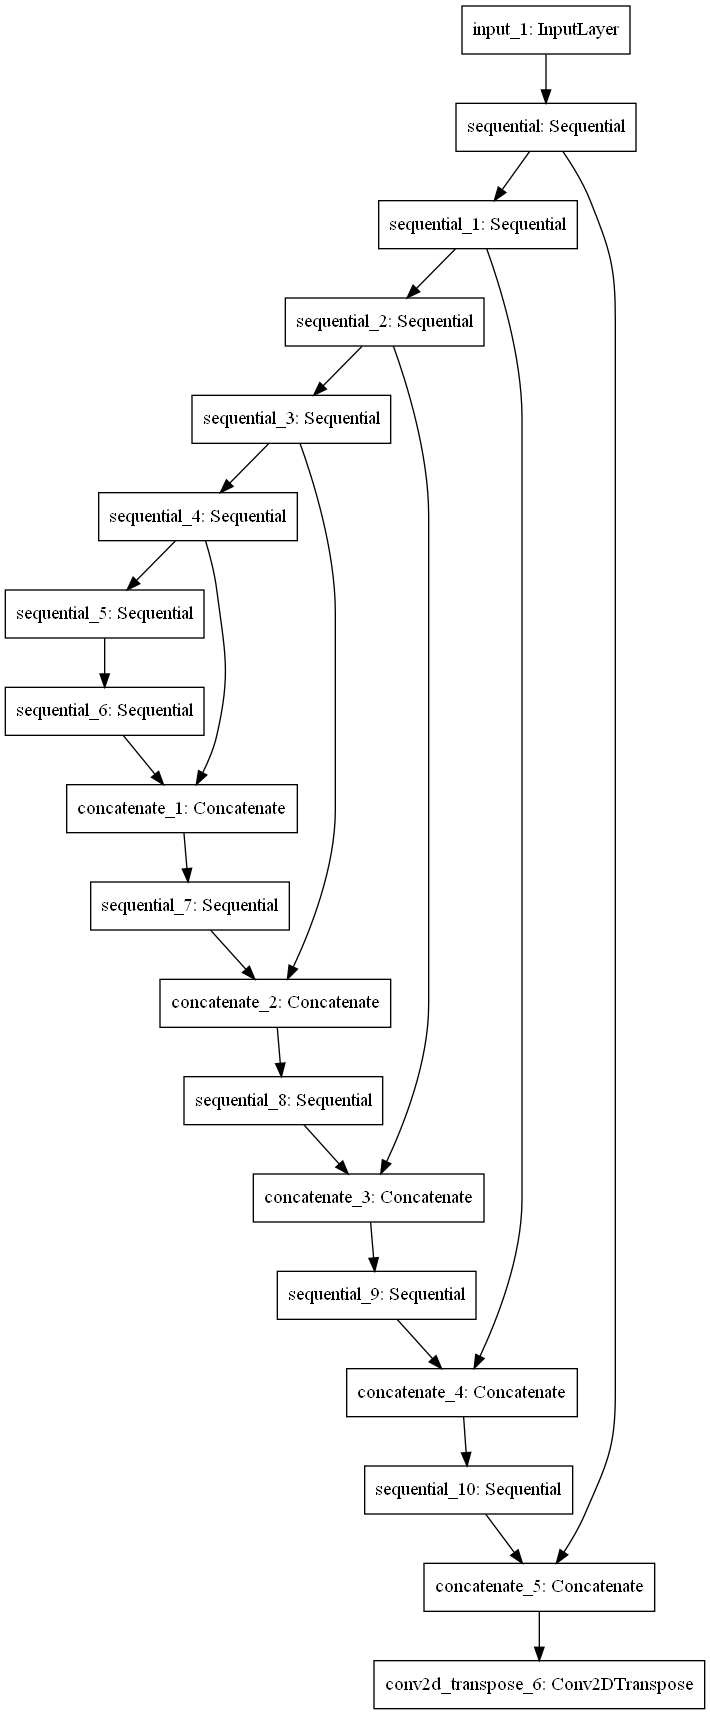

In [5]:
from tensorflow.keras.utils import plot_model
model = get_unet()
plot_model(model, to_file="D:\\Jupyter notebook\\Dataset\\graph\\unet.png")

## 创建数据集生成器

In [6]:
LUT = {
    (0, 0, 0): 0,  # background
    (128, 0, 0): 1,  # aeroplane
    (0, 128, 0): 2,  # bicycle
    (128, 128, 0): 3,  # bird
    (0, 0, 128): 4,  # boat
    (128, 0, 128): 5,  # bottle
    (0, 128, 128): 6,  # bus
    (128, 128, 128): 7,  # car
    (64, 0, 0): 8,  # cat
    (192, 0, 0): 9,  # chair
    (64, 128, 0): 10,  # cow
    (192, 128, 0): 11,  # diningtable
    (64, 0, 128): 12,  # dog
    (192, 0, 128): 13,  # horse
    (64, 128, 128): 14,  # motorbike
    (192, 128, 128): 15,  # person
    (0, 64, 0): 16,  # pottedplant
    (128, 64, 0): 17,  # sheep
    (0, 192, 0): 18,  # sofa
    (128, 192, 0): 19,  # train
    (0, 64, 128): 20,  # tvmonitor
    (255, 255, 255): 21,  # undefined / don't care
}

In [26]:
class Voc2007Semantic(tfds.image.Voc2007):
    """Pasval VOC 2007 - semantic segmentation."""

    VERSION = tfds.core.Version("0.1.0")

    def _info(self):
        parent_info = tfds.image.Voc2007().info
        print(parent_info)
        return tfds.core.DatasetInfo(
            builder=self,
            description=parent_info.description,
            features=tfds.features.FeaturesDict(
                {
                    "image": tfds.features.Image(shape=(None, None, 3)),
                    "image/filename": tfds.features.Text(),
                    "label": tfds.features.Image(shape=(None, None, 1)),
                }
            ),
            homepage=parent_info.urls,
            citation=parent_info.citation,
        )
    
    def _split_generators(self, dl_manager):
        trainval_path = dl_manager.download_and_extract(os.path.join(_VOC2007_DATA_URL,"VOCtrainval_06-Nov-2007.tar"))
        test_path = dl_manager.download_and_extract(os.path.join(_VOC2007_DATA_URL,"VOCtest_06-Nov-2007.tar"))
        return [
            tfds.core.SplitGenerator(
            name=tfds.Split.TEST,
            num_shards=1,
            gen_kwargs=dict(data_path=test_path, set_name="test")),
            tfds.core.SplitGenerator(
            name=tfds.Split.TRAIN,
            num_shards=1,
            gen_kwargs=dict(data_path=trainval_path, set_name="train")),
            tfds.core.SplitGenerator(
            name=tfds.Split.VALIDATION,
            num_shards=1,
            gen_kwargs=dict(data_path=trainval_path, set_name="val")),
        ]

    def _generate_examples(self, data_path, set_name):
        set_filepath = os.path.join(
            data_path,
            "VOCdevkit/VOC2007/ImageSets/Segmentation/{}.txt".format(set_name),
        )
        with tf.io.gfile.GFile(set_filepath, "r") as f:
            for line in f:
                image_id = line.strip()

                image_filepath = os.path.join(
                    data_path, "VOCdevkit", "VOC2007", "JPEGImages", f"{image_id}.jpg"
                )
                label_filepath = os.path.join(
                    data_path,
                    "VOCdevkit",
                    "VOC2007",
                    "SegmentationClass",
                    f"{image_id}.png",
                )

                if not tf.io.gfile.exists(label_filepath):
                    continue

                label_rgb = tf.image.decode_image(
                    tf.io.read_file(label_filepath), channels=3
                )

                label = tf.Variable(
                    tf.expand_dims(
                        tf.zeros(shape=tf.shape(label_rgb)[:-1], dtype=tf.uint8), -1
                    )
                )

                for color, label_id in LUT.items():
                    match = tf.reduce_all(tf.equal(label_rgb, color), axis=[2])
                    labeled = tf.expand_dims(tf.cast(match, tf.uint8), axis=-1)
                    label.assign_add(labeled * label_id)

                colored = tf.not_equal(tf.reduce_sum(label), tf.constant(0, tf.uint8))
                # Certain labels have wrong RGB values
                if not colored.numpy():
                    tf.print("error parsing: ", label_filepath)
                    continue
                key = image_id
                example = {
                    # Declaring in _info "image" as a tfds.feature.Image
                    # we can use both an image or a string. If a string is detected
                    # it is supposed to be the image path and tfds take care of the
                    # reading process.
                    "image": image_filepath,
                    "image/filename": f"{image_id}.jpg",
                    "label": label.numpy(),
                }
                yield (key, example)

AttributeError: module 'tensorflow_datasets.image' has no attribute 'Voc2007'

In [27]:
import tensorflow_datasets.image

In [30]:
tensorflow_datasets.image??

In [31]:
print(tfds.list_builders())
dataset, info = tfds.load("voc2007_semantic", with_info=True)

['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'arc', 'bair_robot_pushing_small', 'bccd', 'beans', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'blimp', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_adroit_hammer', 'd4rl_adroit_pen', 'd4rl_adroit_relocate', 'd4rl_mujoco_ant', 'd4rl_mujoco_halfcheetah', 'd4rl_mujoco_hopper', 'd4rl_mujoco_walk

TypeError: <class '__main__.Voc2007Semantic'> is a built-in class

## 模型训练与评估

In [23]:
train_set = dataset["train"]


def resize_and_scale(row):
    # Resize and convert to float, [0,1] range
    row["image"] = tf.image.convert_image_dtype(
        tf.image.resize(
            row["image"], (256, 256), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
        ),
        tf.float32,
    )
    # Resize, cast to int64 since it is a supported label type
    row["label"] = tf.cast(
        tf.image.resize(
            row["label"], (256, 256), method=tf.image.ResizeMethod.NEAREST_NEIGHBOR
        ),
        tf.int64,
    )
    return row


def to_pair(row):
    return row["image"], row["label"]


batch_size = 32

train_set = train_set.map(resize_and_scale).map(to_pair)
train_set = train_set.batch(batch_size).prefetch(1)

validation_set = dataset["validation"].map(resize_and_scale)
validation_set = validation_set.map(to_pair).batch(batch_size)


NameError: name 'dataset' is not defined

In [ ]:
model = get_unet()

optimizer = tf.optimizers.Adam()

checkpoint_path = "ckpt/pb.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, save_weights_only=True, verbose=1
)
tensorboard = tf.keras.callbacks.TensorBoard(write_images=True)
model.compile(
    optimizer=optimizer,
    # loss=lambda y_true, y_pred: tf.losses.SparseCategoricalCrossentropy(from_logits=True)(y_true, y_pred) + tf.losses.MeanAbsoluteError()(y_true, y_pred),
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)  # , tf.metrics.MeanIoU(num_classes=21)])


num_epochs = 50
model.fit(
    train_set,
    validation_data=validation_set,
    epochs=num_epochs,
    callbacks=[cp_callback, tensorboard],
)

# 在生产环境部署模型

SavedModel是TensorFlow模型的一种通用序列化格式，它通过创建可恢复的、封闭的、与语言无关的计算表示来扩展TensorFlow的标准图。SavedModel格式是研究和开发阶段与部署阶段之间唯一的桥梁。一个SavedModel包含一个完整的计算图，包括模型参数和在其创建阶段指定的任何东西。SavedModel主要特征：图标注、签名定义、资源文件、设备清理。

##  SavedModel序列化格式

In [48]:
import tensorflow as tf
import tensorflow_hub as hub
#首先定义输入层
inputs = tf.keras.layers.Input(shape=(299, 299, 3))
#使用Tensorflow Hub定义固定的特征提取器
import os
os.environ["TFHUB_CACHE_DIR"] = 'D:\\Jupyter notebook\\Dataset\\tfhub'
net = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/2", 
                     output_shape=[2048], 
                     trainable=False,)(inputs)
#定义回归头
regression_head = tf.keras.layers.Dense(512)(net)
regression_head = tf.keras.layers.ReLU()(regression_head)
coordinates = tf.keras.layers.Dense(4, use_bias=False)(regression_head)
#定义分类头,经过训练可以对特征提取器提取的特征进行分类
classification_head = tf.keras.layers.Dense(1024)(net)
classification_head = tf.keras.layers.ReLU()(classification_head)
classification_head = tf.keras.layers.Dense(128)(net)
classification_head = tf.keras.layers.ReLU()(classification_head)
num_classes = 20
classification_head = tf.keras.layers.Dense(num_classes, use_bias=False)(classification_head)
#定义Keras模型来执行定位和分类
model = tf.keras.Model(inputs=inputs, outputs=[coordinates, classification_head])

In [49]:
#通过Keras模型创建SavedModel
path = "D:\\Jupyter notebook\\Dataset\\model\\model_1"
tf.saved_model.save(model, path)
"""
assets包含辅助文件。
variables包含模型变量。
saved_model.pb是编译后的Protobuf。这是Keras模型所描述的计算的一个二进制表示。
"""

INFO:tensorflow:Assets written to: D:\Dataset\model\model_1\assets


INFO:tensorflow:Assets written to: D:\Dataset\model\model_1\assets


'\nassets包含辅助文件。\nvariables包含模型变量。\nsaved_model.pb是编译后的Protobuf。这是Keras模型所描述的计算的一个二进制表示。\n'

In [50]:
#使用通用函数进行SavedModel转换
class Wrapper(tf.Module):
    
    @tf.function(input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32),
                                 tf.TensorSpec(shape=None, dtype=tf.float32),])
    def pow(self, x, y):
        return tf.math.pow(x, y)
    
obj = Wrapper()
tf.saved_model.save(obj, "D:\\Jupyter notebook\\Dataset\\model\\model_2")

INFO:tensorflow:Assets written to: D:\Dataset\model\model_2\assets


INFO:tensorflow:Assets written to: D:\Dataset\model\model_2\assets


## Python部署 

使用Python可以直接加载存储在SavedModel中的计算图，并将其作为本地Python函数使用。

In [51]:
#通用计算图
path = "D:\\Jupyter notebook\\Dataset\\model\\model_2"
imported = tf.saved_model.load(path)

po = imported.signatures["serving_default"]#使用默认签名
result = po(x = tf.constant(2.0), y = tf.constant(5.0))
result

{'output_0': <tf.Tensor: shape=(), dtype=float32, numpy=32.0>}

In [52]:
#Keras模型
path = "D:\\Jupyter notebook\\Dataset\\model\\model_1"
outputs = tf.saved_model.load(path)

In [53]:
#或者Keras自带的模型加载函数
model = tf.keras.models.load_model(path)